<a href="https://colab.research.google.com/github/gbessardon/foodhub_data_analysis/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Calulate the number of row (nrows) in the DataFrame
nrows= len(df.index)
# Calculate the number of columns (ncols) in the DataFrame
ncols=len(df.columns)
# I use a f-string to print the result
print (f'There are {nrows} rows and {ncols} columns in the DataFrame')

There are 1898 rows and 9 columns in the DataFrame



#### Observations:
The index and columns methods associated with the len() function  are used to determine that the  DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# I can use info to extract the different column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Other option is to loop over the columns
for c in df.columns:
  datatype=df[c].dtype
  print(f'Column {c} is of type {datatype} ')

Column order_id is of type int64 
Column customer_id is of type int64 
Column restaurant_name is of type object 
Column cuisine_type is of type object 
Column cost_of_the_order is of type float64 
Column day_of_the_week is of type object 
Column rating is of type object 
Column food_preparation_time is of type int64 
Column delivery_time is of type int64 


#### Observations: I used two methods to show that :
*   Column order_id is of type int64
*   Column customer_id is of type int64
*   Column customer_id is of type int64
*   Column restaurant_name is of type object
*   Column cuisine_type is of type object
*   Column cost_of_the_order is of type float64
*   Column day_of_the_week is of type object
*   Column rating is of type object
*   Column food_preparation_time is of type int64
*   Column delivery_time is of type int64

I note that rating will need some extra care as it is a numerical value that appears as object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# I use the isnull method and the sum method to count how many values are missing
missing_values_count = df.isna().sum()
# I use the sum method to count the total number of missing values across all columns
total_missing_values = missing_values_count.sum()
# I print the results using a if condition to cover the different cases
if total_missing_values==0:
  print(f'There are no missing value')
elif total_missing_values==1:
  print(f'There is 1 missing value')
else:
  print(f'There are {total_missing_values} missing values')



There are no missing value


#### Observations:
I used the function isna() and twice the function sum to determine that there are **no missing values**
Note that in the rating column the value 'Not given' was used to fill missing value, these values will be treated in question 5

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# I use the method describe to obtain the statistical summary of the column food_preparation_time
summary=df['food_preparation_time'].describe()
# I use the loc method to look at the minimum average and maximum values
min_time=summary.loc['min']
print(f'The minimum time it takes for the food to be prepared once an order is placed is {min_time} minutes')
avg_time=summary.loc['mean']
print(f'The average time it takes for the food to be prepared once an order is placed is {avg_time} minutes')
max_time=summary.loc['max']
print(f'The maximum time it takes for the food to be prepared once an order is placed is {max_time} minutes')

The minimum time it takes for the food to be prepared once an order is placed is 20.0 minutes
The average time it takes for the food to be prepared once an order is placed is 27.371970495258168 minutes
The maximum time it takes for the food to be prepared once an order is placed is 35.0 minutes


In [ ]:
# Nobody talks in decimal minutes so I decide to create a function to convert the time in minutes and seconds
def convert_time(time):
  """
  This function converts the time in minutes and seconds to minutes
  Parameters
  ----------
  time : float
    The time minutes and decimal minuites
  Returns
  -------
  minutes : int
    The integer part of the time in minutes
  seconds : int
    The decimal minutes converted to the closest seconds
  """
  minutes=np.floor(time)
  seconds=np.round((time-minutes)*60)
  return (minutes,seconds)

In [ ]:
# I print the formatted results
min_min,min_s=convert_time(min_time)
print(f'The minimum time it takes for the food to be prepared once an order is placed is {int(min_min)} minutes {int(min_s)} seconds')
avg_min,avg_s=convert_time(avg_time)
print(f'The average time it takes for the food to be prepared once an order is placed is {int(avg_min)} minutes {int(avg_s)} seconds')
max_min,max_s=convert_time(max_time)
print(f'The maximum time it takes for the food to be prepared once an order is placed is {int(max_min)} minutes {int(max_s)} seconds')

The minimum time it takes for the food to be prepared once an order is placed is 20 minutes 0 seconds
The average time it takes for the food to be prepared once an order is placed is 27 minutes 22 seconds
The maximum time it takes for the food to be prepared once an order is placed is 35 minutes 0 seconds


#### Observations:
The description of the dataset shows that food preparation time and delivery time are similar but the food preparation is less spread than the delivery.
Focusing on the food_preparation_time column and using the loc method I could identify that:

*   The **minimum time** it takes for the food to be prepared once an order is placed is **20 minutes**
* The **average time** it takes for the food to be prepared once an order is placed is **27 minutes 22 seconds**
* The **maximum time** it takes for the food to be prepared once an order is placed is **35 minutes**




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
"""
From the structure of the data I know that not rated order appear as Not given
I look for not given values in the rating column
and I sum the values to get the total number of not rated orders
"""
not_rated=np.sum(df['rating']=='Not given')
print(f'There are {not_rated} orders that are not rated')

There are 736 orders that are not rated


#### Observations:
I looked for the 'Not given' values in the 'rating' column and them the np.sum() method to find that **736 orders are not rated**

### Exploratory Data Analysis (EDA)


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### customer id

In [ ]:
def histogram_boxplot(feature,title=None,xlabel=None,ylabel=None,plotkde=False,
                      figsize=(15, 10), bins="auto",medianline=True,meananline=True,
                      adjustpercentage=(0,0)):
  """
  This function creates a histogram and a boxplot of a feature
  A big part of this plot is inspired fron the Uber_case_study notebook
  Parameters
  ----------
  feature : pandas series
    The feature to be plotted
  title : str, optional
    The title of the plot, by default None
  xlabel : str, optional
    The x-axis label, by default None
  ylabel : str, optional
    The y-axis label, by default None
  plotkde : bool, optional
    Whether to plot the kernel density estimate, by default False
  figsize : tuple, optional
    The size of the plot, by default (15, 10)
  bins : int or str, optional
    The number of bins, by default "auto"
  medianline : bool, optional
    Whether to plot the median line, by default True
  meananline : bool, optional
    Whether to plot the mean line, by default True
  adjustpercentage : tuple, optional
    Tuple to ajust the percentage annotation position, by default (0,0)
  Returns
  -------
  None
  """
  f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

  # Creating the subplots
  # Boxplot will be created and the mean value of the column will be indicated using some symbol
  sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='pink')

  sns.histplot(x=feature, kde=plotkde,ax=ax_hist,color='cyan')
  # Add mean to the histogran
  if meananline:
    ax_hist.axvline(feature.mean(), color='g', linestyle='-')
  # Add median to the histogran
  if medianline:
    ax_hist.axvline(feature.median(), color='black', linestyle='--')
  if title is not None:
    ax_hist.set_title(title)
  if xlabel is not None:
    ax_hist.set_xlabel(xlabel)
  if ylabel is not None:
    ax_hist.set_ylabel(ylabel)
  for p in ax_hist.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(feature)) # Percentage of each class
    if float(percentage[:-1])>5:
      x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
      y = p.get_y() + p.get_height()                              # Height of the plot
      ax_hist.annotate(percentage, (x+adjustpercentage[0], y+adjustpercentage[1]), size = 12)        # Annotate the percentage
  plt.show()

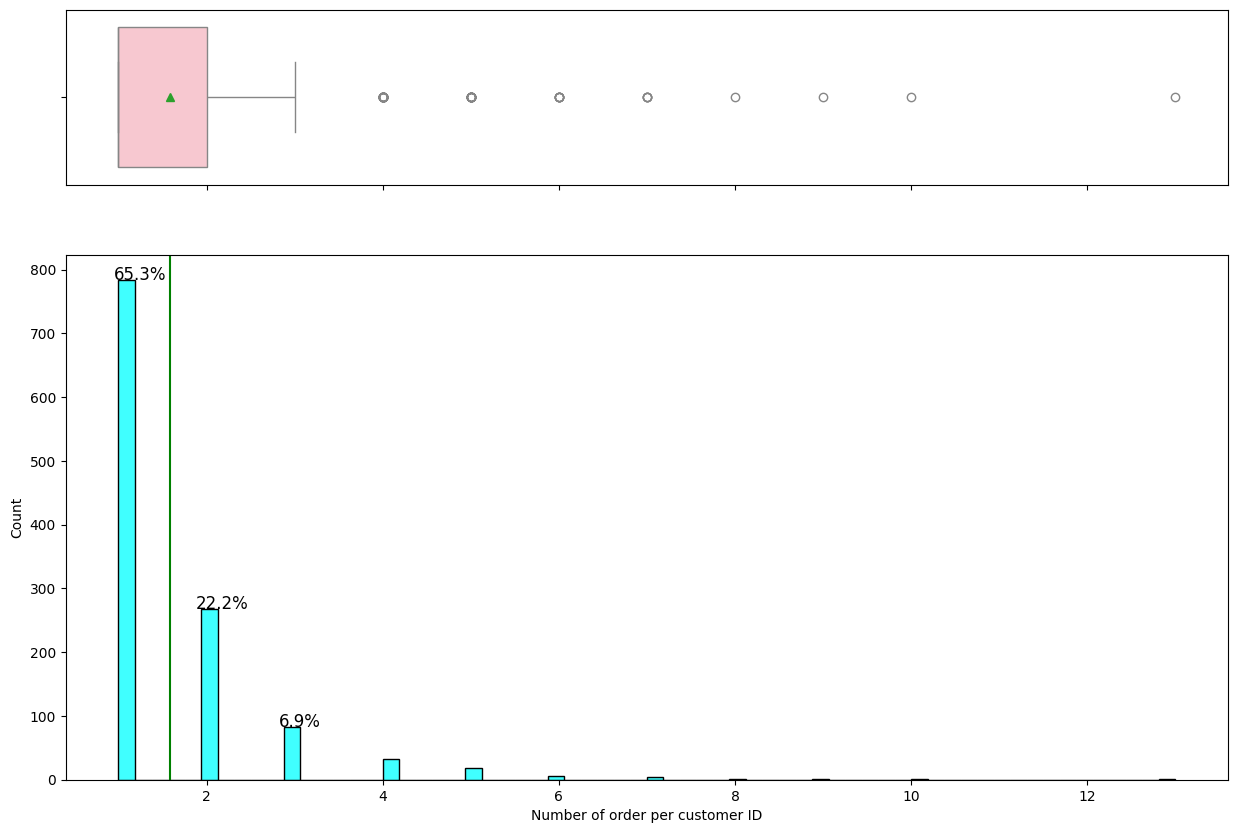

In [ ]:
# Here I count the number of time the customer_id appears to evaluate the number of oreder per customer
histogram_boxplot(df['customer_id'].value_counts(),
                  xlabel='Number of order per customer ID',medianline=False,adjustpercentage=(-0.1,0.5))


##### Observations:


*   The distribution of the number of order is highly right-skewed
*   65.3% of customers have ordered only once.
*   The median order is therefore one. The mean order is closer to 2.
*   94.4 % of customers have ordered 3 times or less values greater than 3 are outliers
*  The maximum order for one customer is 13





#### Cuisine Type

In [ ]:
def bar_perc(data, z, rotatex=0,title=None,xlabel=None,ylabel=None):
  """
  This function creates a bar plot with the percentage of each value
  Parameters
  ----------
  data : pandas dataframe
    The dataframe containing the data
  z : str
    The column name
  rotatex : int, optional
    The rotation of the x-axis labels, by default 0
  title : str, optional
    The title of the plot, by default None
  xlabel : str, optional
    The x-axis label, by default None
  ylabel : str, optional
    The y-axis label, by default None
  Returns
  -------
  None
  """
  lendata=len(data[z])
  plt.figure(figsize = (15, 5))
  ax=sns.countplot(x=z,data=data)
  # Get the name of the maximum count
  max_type = data[z].value_counts().idxmax()
  # Get the x-axis labels
  xtick_labels = [label.get_text() for label in ax.get_xticklabels()]
  # Get the bar corresponding to the maximum count
  max_tick_index=np.where(np.array(xtick_labels)==max_type)[0][0]
  # Change the color of the maximum bar to red
  ax.patches[max_tick_index].set_color('red')
  plt.xticks(rotation=rotatex)
  if title is not None: # Set title
    ax.set_title(title)
  if xlabel is not None:  # Set x-axis label
    ax.set_xlabel(xlabel)
  if ylabel is not None: # Set y-axis label
    ax.set_ylabel(ylabel)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height() / lendata) # Percentage of each class
      x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
      y = p.get_y() + p.get_height()                              # Height of the plot
      ax.annotate(percentage, (x-0.15, y), size = 12)             # Annotate the percentage
  plt.show()

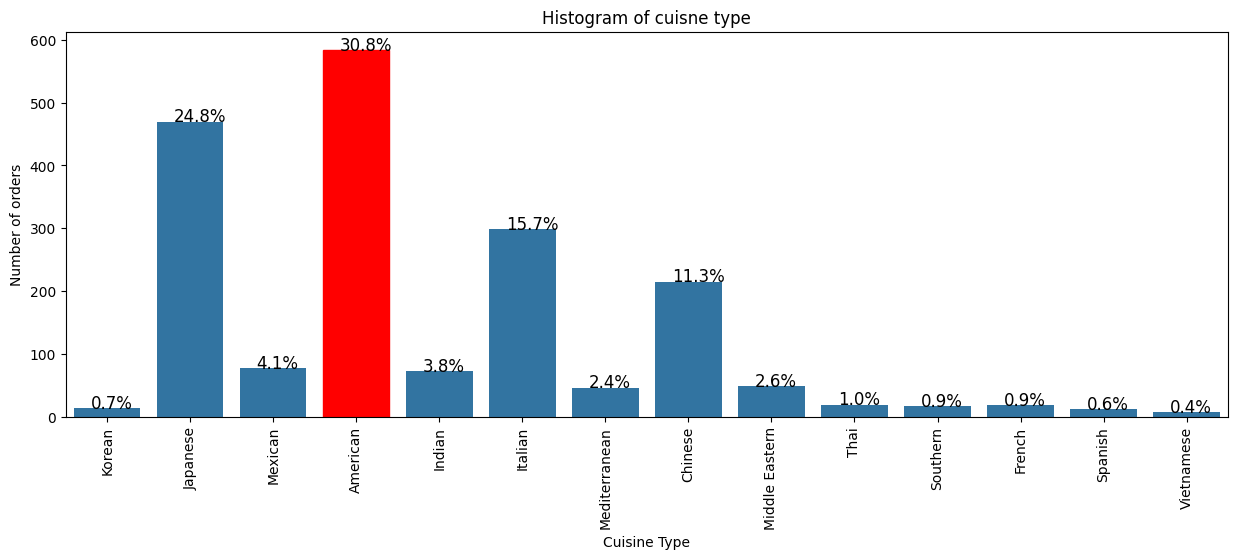

In [ ]:
bar_perc(df, 'cuisine_type', rotatex=90,
         title='Histogram of cuisne type',
         xlabel='Cuisine Type',ylabel='Number of orders')

##### Observations:


*   The two cuisine types ordered the most often are american food (30.8%), and Japanese food (24.8%)
*   Italian and Chinese food are also ordered more than 10% of the time.
* Every other food type represents less than 5% of all orders



#### Cost of the order

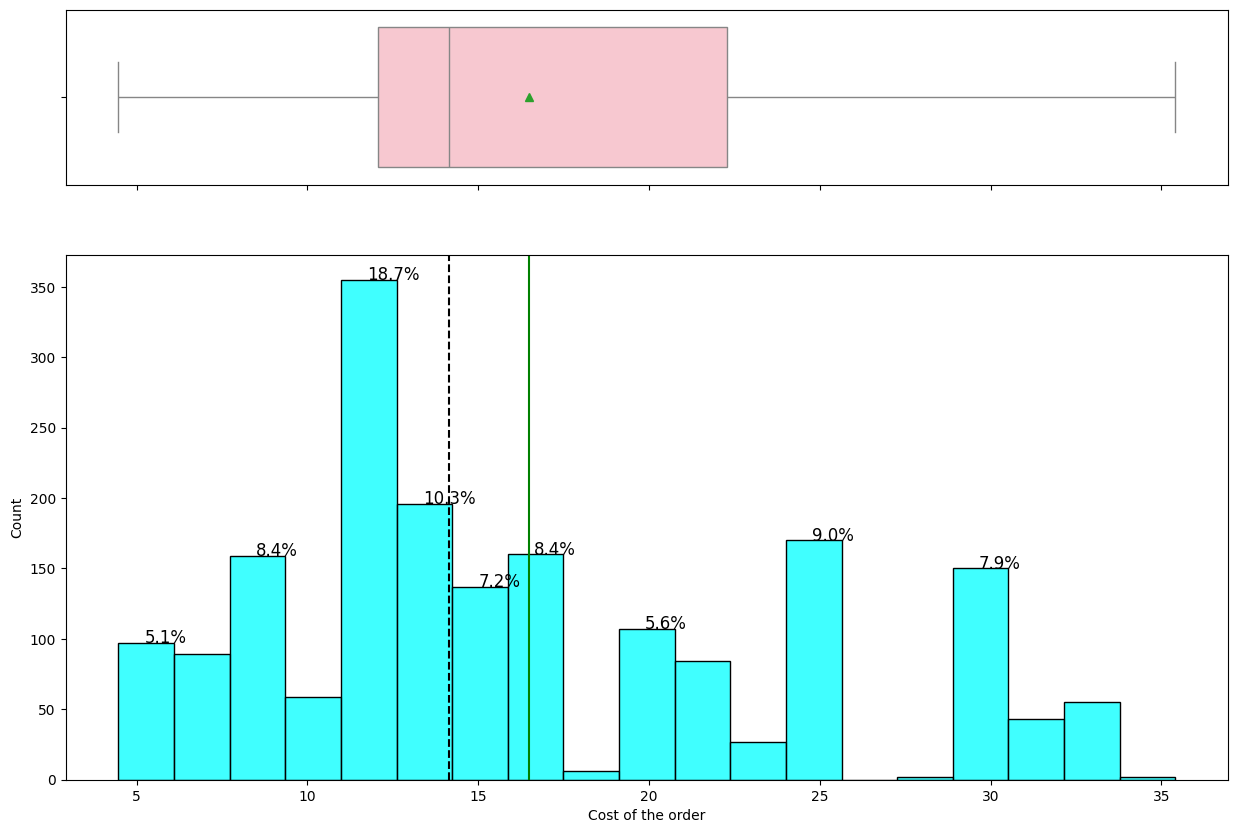

In [ ]:
histogram_boxplot(df['cost_of_the_order'],xlabel='Cost of the order',bins="auto")


##### Observations:


*   The ditribution of order cost is lightly right skewed there is no outliers
*   The median order is about 14.15\$ while the mean order is 16.5\$
*   The maximum order is about 35\$



#### Day of the week

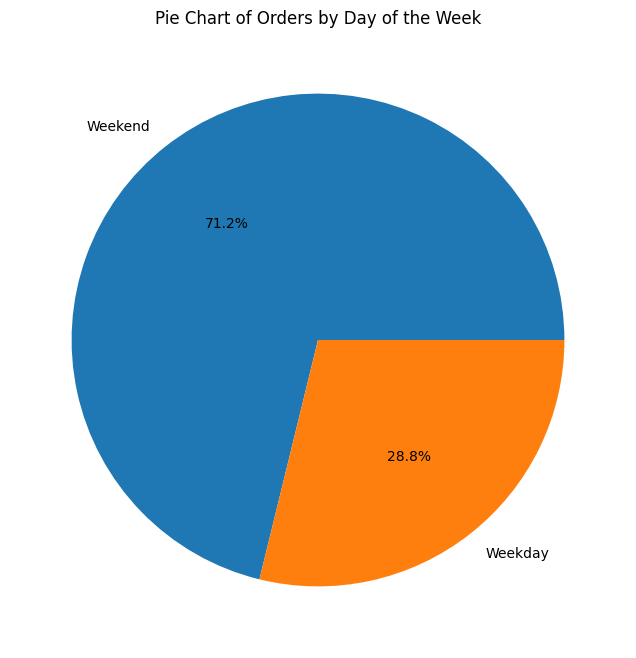

In [ ]:
# Here I plot a pie chart
plt.figure(figsize=(8, 8))
df["day_of_the_week"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pie Chart of Orders by Day of the Week")
plt.ylabel("")
plt.show()

##### Observations:
71.2% of the orders take place the Weekend.

#### Rating

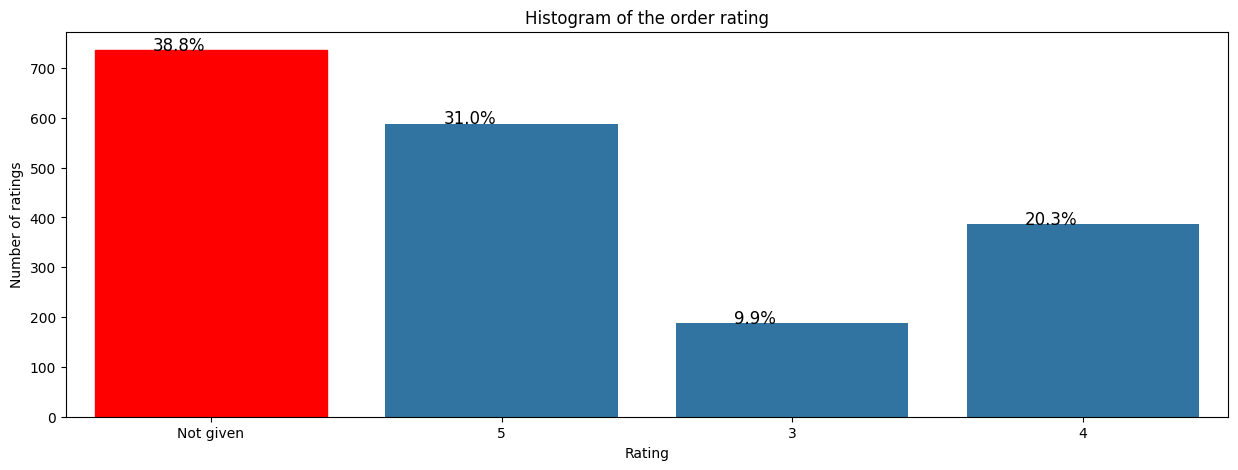

In [ ]:
bar_perc(df, 'rating', rotatex=0,
         title='Histogram of the order rating',
         xlabel='Rating',ylabel='Number of ratings')

##### Observation:
* No rating is given for 38.4% of the order
* When given the most frequent rating is 5 the least frequent is 3
* No rating is below 3



##### Let´s see when the rating is given

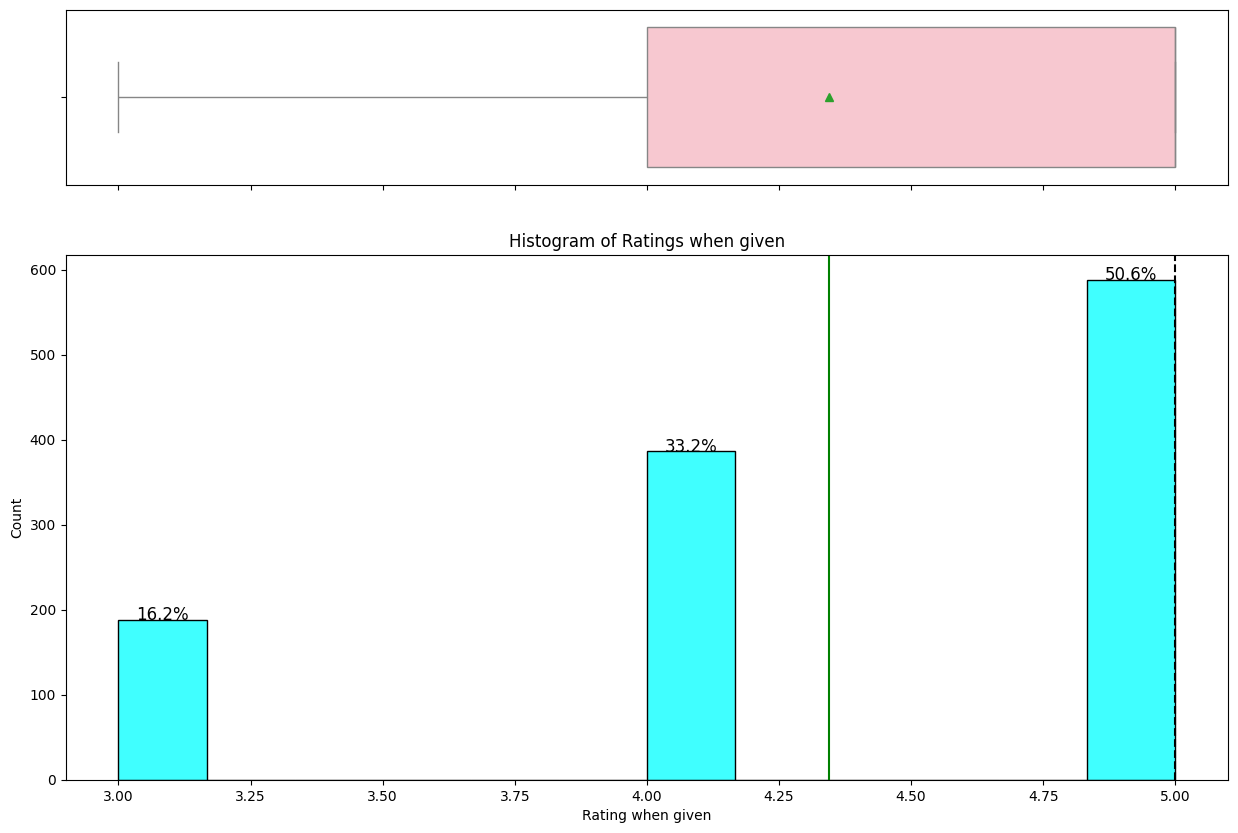

In [ ]:
# I filter out the 'Not given' lines
filtereddf=df.loc[(df['rating']!='Not given')].reset_index()
# I convert the rating column to int
filtereddf['rating']=filtereddf['rating'].astype(int)

histogram_boxplot(filtereddf['rating'],xlabel='Rating when given',bins="auto",title='Histogram of Ratings when given')


##### Observations:


* The rating distribution is highly left-skewed with no outliers   
* The majority (50.6%) of the ratings is 5 and the median too, the mean rating is about 4.3
* The less frequent rating (16.2%) is also the minimum of 3



#### Food preparation

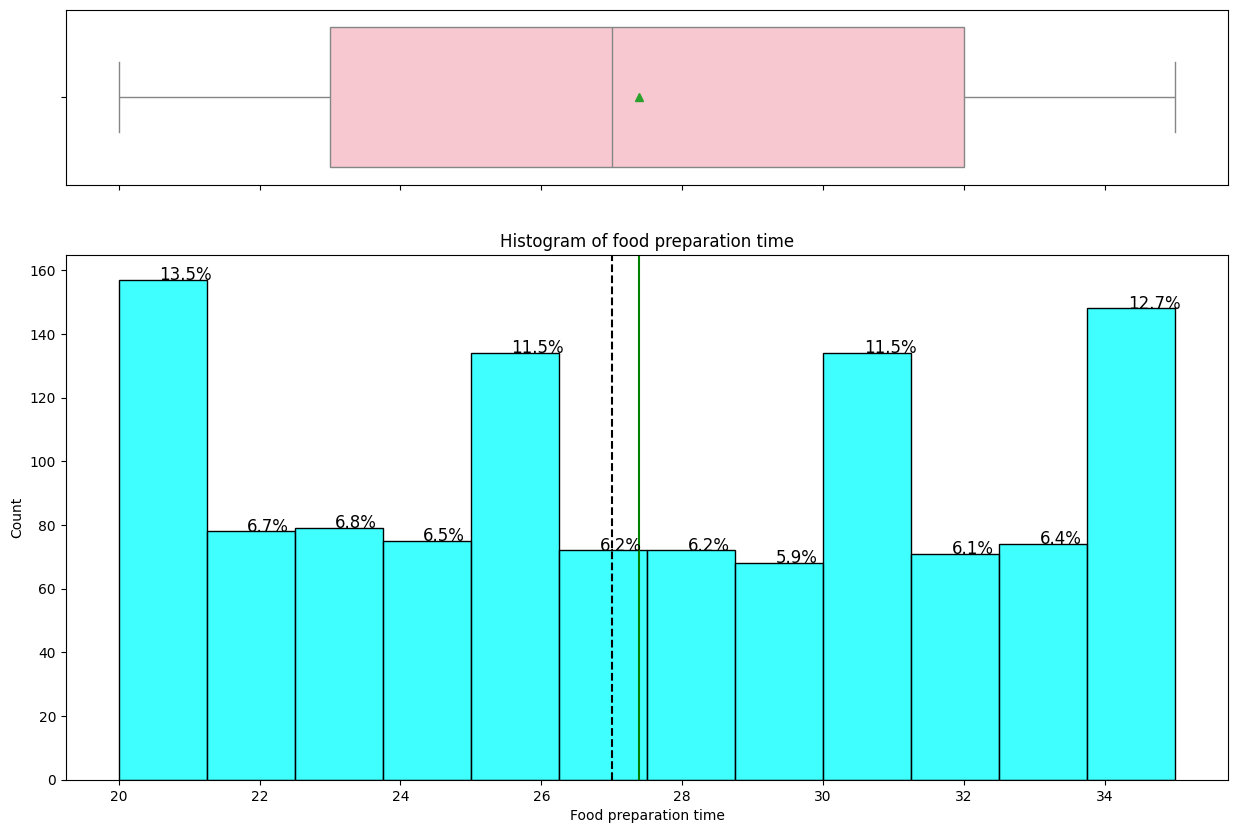

In [ ]:
histogram_boxplot(filtereddf['food_preparation_time'],xlabel='Food preparation time',bins="auto",title='Histogram of food preparation time')

##### Observations:
* The food preapartion time is lightly right-skewed
* The median food preapration time is 27 minutes while the mean is about 27 minutes and 20 seconds
* The minimum and the maximum preparation times (20 and 35 minutes) are also the most frequent 13.5% and 12.5%

#### Delivery time

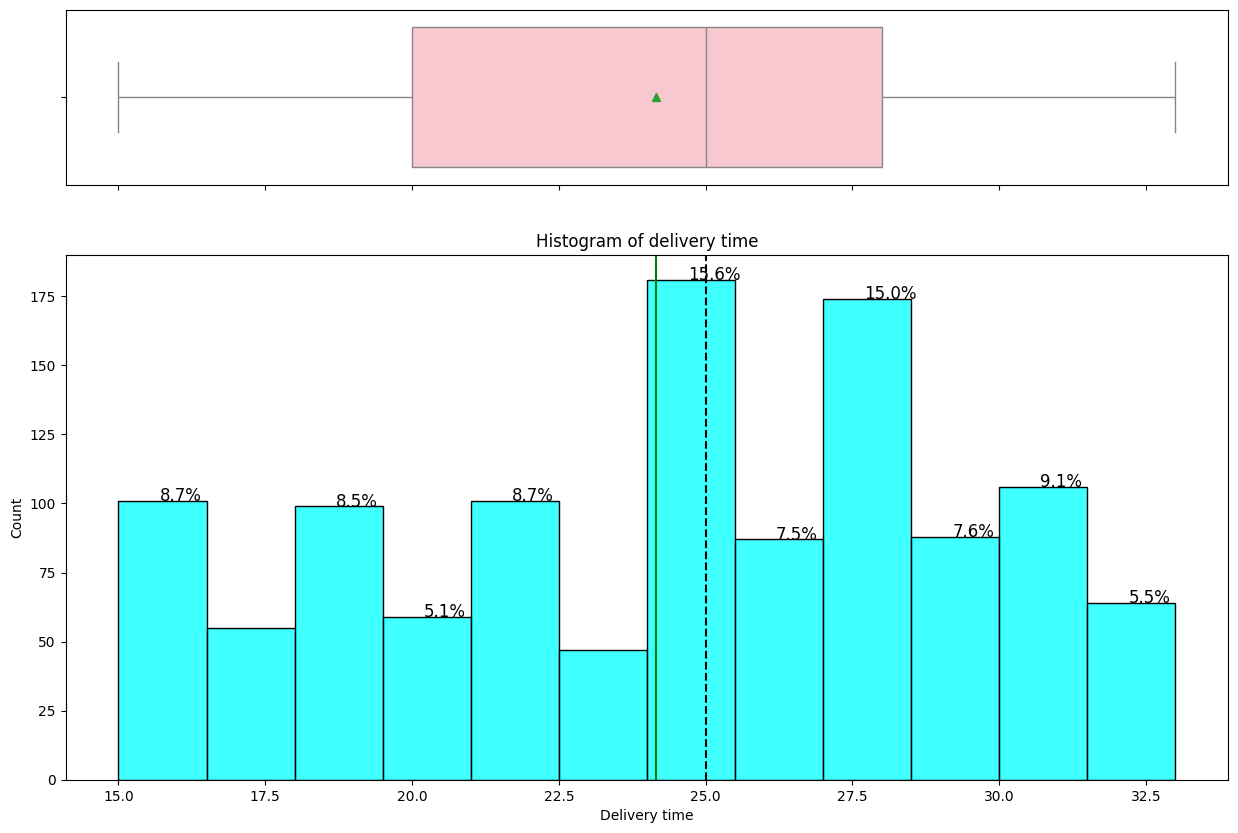

In [ ]:
histogram_boxplot(filtereddf['delivery_time'],xlabel='Delivery time',bins="auto",title='Histogram of delivery time')

##### Observations:
* The delivery time is lightly left-skewed
* The median delivery time e is 25 minutes while the mean is about 24 minutes
* The most frequend delivery time is about 25 minutes (15.6%) followed by 27 and (38.1% of the orders are delivered between 24 and 28 minutes.
* 8.7% of the orders are delivered in about 15 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
"""
I use the value_counts method to count the number of orders for each restaurant
then I use the head method to get the top 5 restaurants
"""
top5restaurants=df['restaurant_name'].value_counts().head(5)
"""
I use the index attribute to get the names of the top 5 restaurants
"""
print('The top 5 restaurants in terms of the number of orders received are:')
for i in range(0,len(top5restaurants.index)):
    restaurant=top5restaurants.index[i]
    orders=top5restaurants.iloc[i]
    print(f'{restaurant} with {orders} orders received')

The top 5 restaurants in terms of the number of orders received are:
Shake Shack with 219 orders received
The Meatball Shop with 132 orders received
Blue Ribbon Sushi with 119 orders received
Blue Ribbon Fried Chicken with 96 orders received
Parm with 68 orders received


#### Observations:
I have used the value_counts method and the head method to get the top 5 restaurants in terms of orders received.
The top 5 restaurants are:
*   Shake Shack with 219 orders received
*   The Meatball Shop with 132 orders received
*   Blue Ribbon Sushi with 119 orders received
*   Blue Ribbon Fried Chicken with 96 orders received
*   Parm with 68 orders received



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

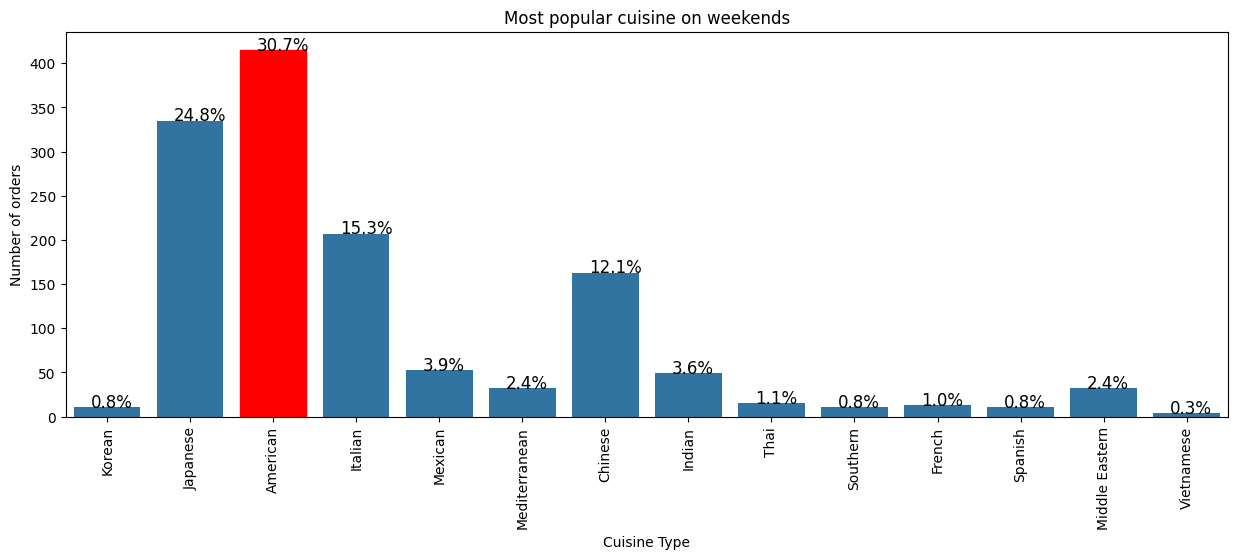

In [ ]:
weekend_df = df[df['day_of_the_week'] == 'Weekend']
bar_perc(weekend_df , 'cuisine_type', rotatex=90,
         title='Most popular cuisine on weekends',
         xlabel='Cuisine Type',ylabel='Number of orders')

#### Observations:
The countplot shows the number of orders per cusine type for the weekend. The red bar indicates the highest number of order, **american cuisine is the most popular cuisine over the weekend** with 30.7% of all the orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
"""
To calculate the percentage tof orders costing more than 20 dollars
I count the number of orders that cost more than 20 dollars using the np.sum
and divide it by the total number of orders
"""
minmum_cost=20 # I set this value to easily change the criteria if needed
over20d=np.sum(df['cost_of_the_order']>minmum_cost)/len(df['cost_of_the_order'])*100
print(f'The percentage of the orders that cost more than 20 dollars is {over20d}%')

The percentage of the orders that cost more than 20 dollars is 29.24130663856691%


#### Observations:
I have used the np.sum() method and len method to determine that **29.24% of the orders cost more than 20$**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
"""
To determine the mean order delivery time I select the delivery_time column and
use the np.mean method
"""
mean_dt=np.mean(df['delivery_time'])
print(f'The mean order delivery time is {mean_dt}  minutes')
"""
Nobody talks in decimal minutes so I convert the final result in minutes
and second by multiplying the decimal part of the result by 60 and rounding it up
"""
minutes=np.floor(mean_dt)
seconds=np.round((mean_dt-minutes)*60)
print(f'The mean order delivery time is {int(minutes)}  minutes {int(seconds)} seconds')

The mean order delivery time is 24.161749209694417  minutes
The mean order delivery time is 24  minutes 10 seconds



#### Observations:
I used the numpy mean method to determine and did some decimal handling to determine that the **mean order delivery time is 24 mintues 10 seconds.**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
"""
I use the value_counts method to count the number of orders per customer_id
then I use the head method to get the top 3 customers
"""
top3customers=df['customer_id'].value_counts().head(3)
"""
I use the index attribute to get the names of the top 3 customer and their index in the serie
"""
print('The top 3 customers in terms of the number of orders placed are:')
for i in range(0,len(top3customers.index)):
  customer=top3customers.index[i]
  orders=top3customers.iloc[i]
  print(f'Customer {customer} with {orders} orders placed')

The top 3 customers in terms of the number of orders placed are:
Customer 52832 with 13 orders placed
Customer 47440 with 10 orders placed
Customer 83287 with 9 orders placed


#### Observations:
Similarly to question 7 I used the value count method to determine the top3 customer then I use the index and the iloc method to print their customer_id and number of order placed.
The top 3 customers in terms of the number of orders placed are:
*   Customer 52832 placed 13 orders
*   Customer 47440 placed 10 orders
*   Customer 83287 placed 9 orders






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Multivariante heatmaps

<Axes: >

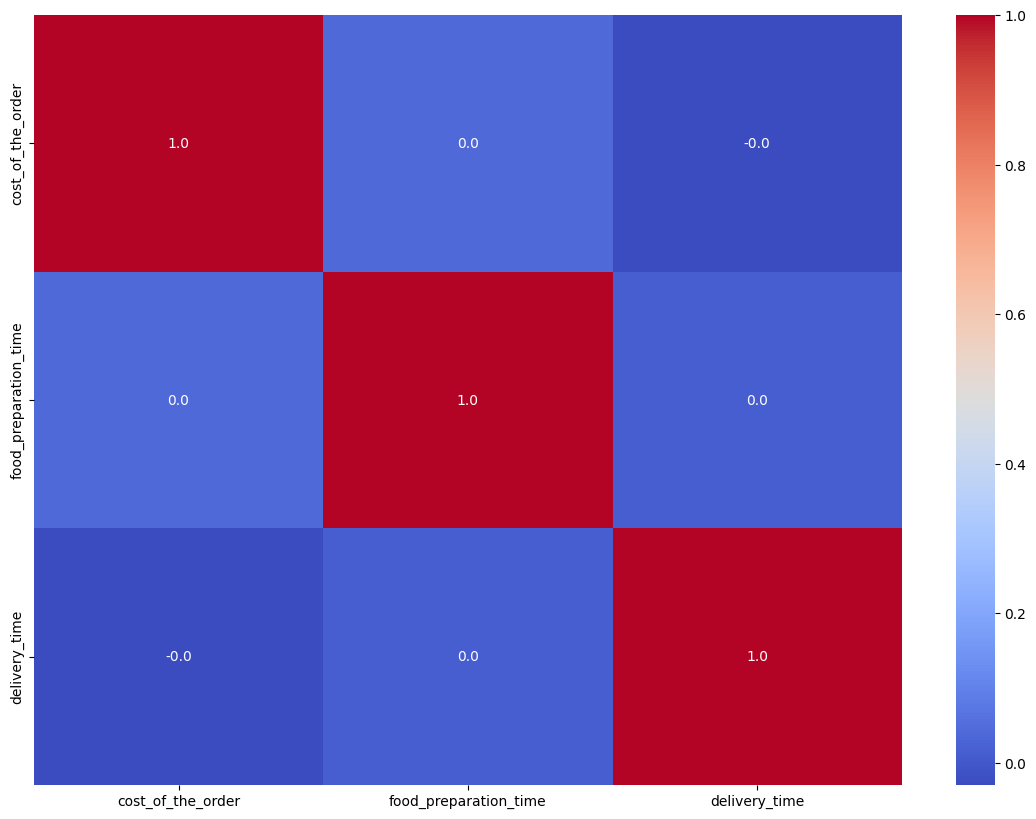

In [ ]:
# Heat map between the numreical
num_var=['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize = (14, 10))
sns.heatmap(df[num_var].corr(),annot=True, cmap = 'coolwarm',fmt = ".1f")

##### let's add the ratings

<Axes: >

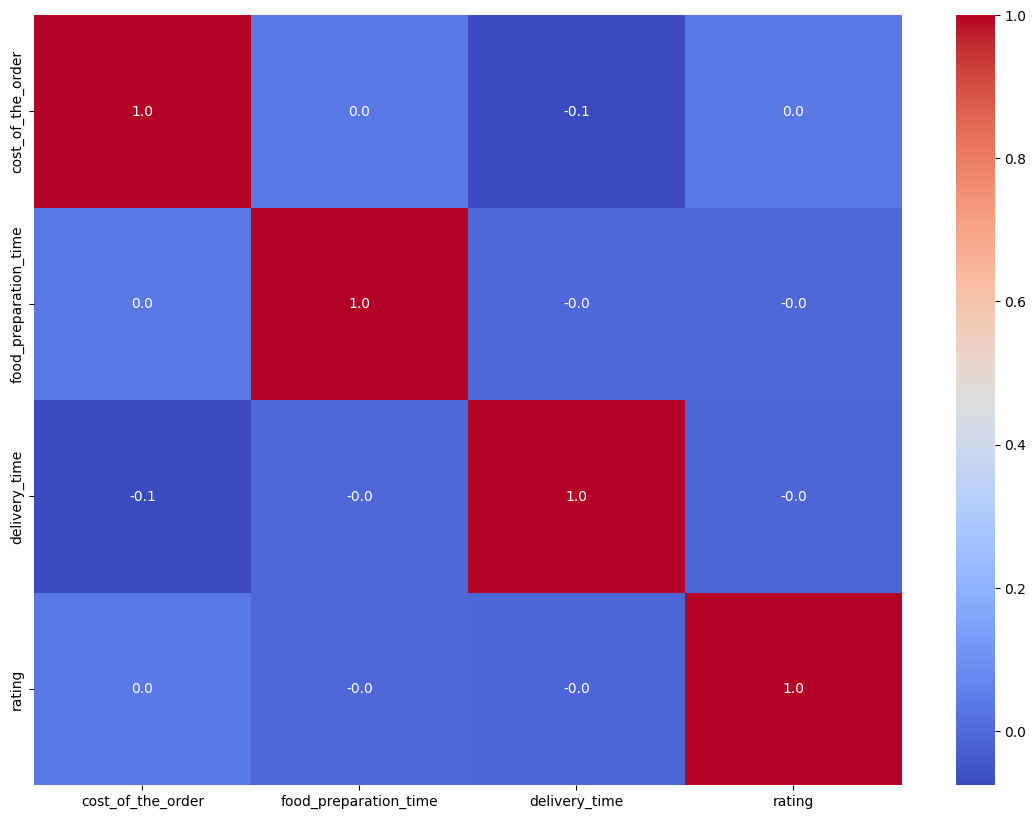

In [ ]:
num_var=['cost_of_the_order','food_preparation_time','delivery_time','rating']
plt.figure(figsize = (14, 10))
sns.heatmap(filtereddf[num_var].corr(),annot=True, cmap = 'coolwarm',fmt = ".1f")

##### Observation:
There is no correlation between rating, cost of the order, delivery time and food preparation time

#### Relationship between day of the week cuisine Type and other variables

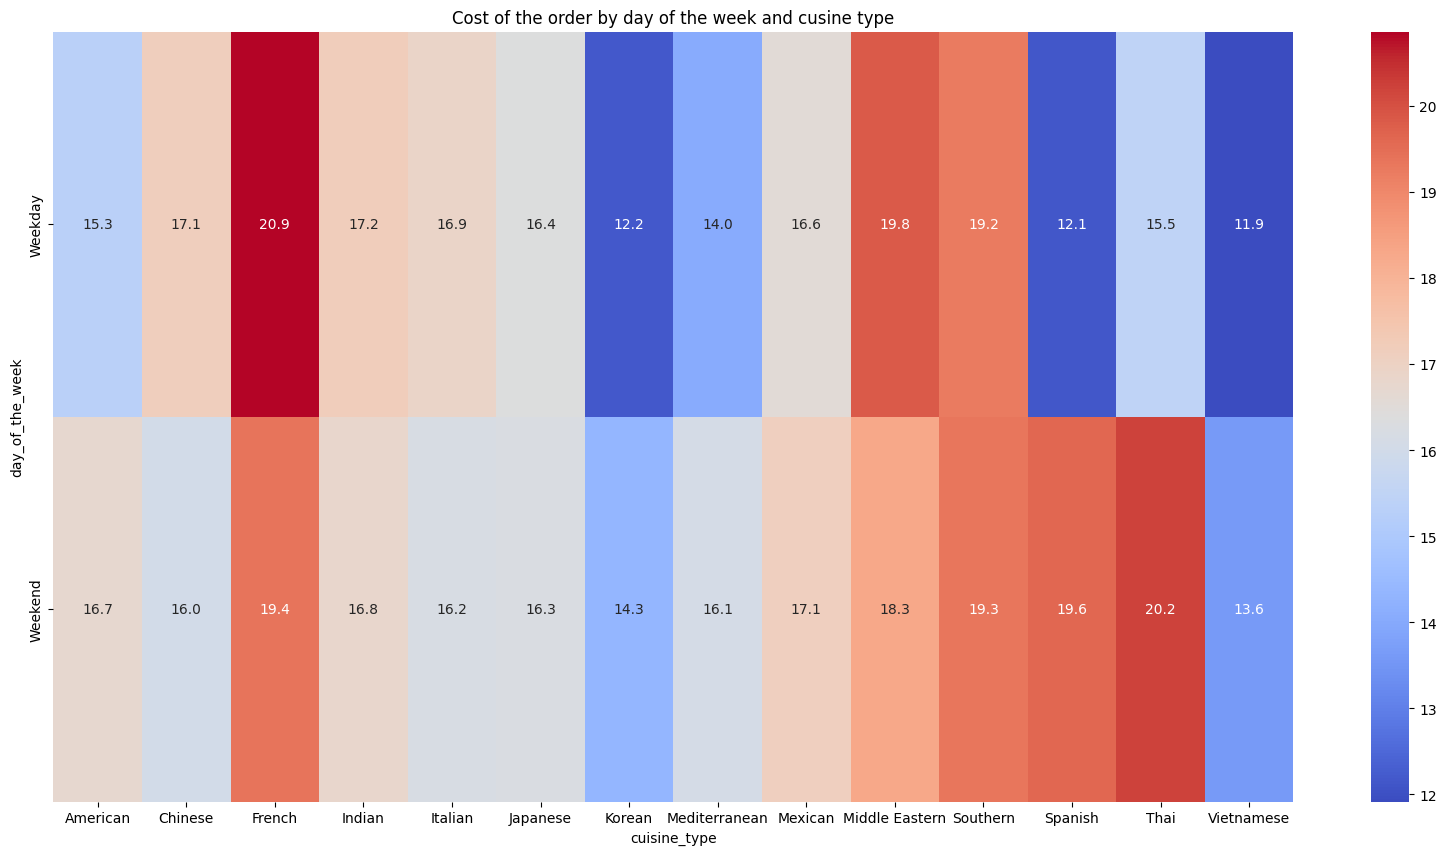

In [ ]:
# Create a pivot table
df_hm = df.pivot_table(index='day_of_the_week',columns='cuisine_type',values='cost_of_the_order',aggfunc='mean')
# Draw a heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(df_hm,annot=True, cmap = 'coolwarm',fmt = ".1f")
plt.title('Cost of the order by day of the week and cusine type')
plt.show()

##### Observations:


*   The 3 most popuar cuisine American, Japanese, Italian (shown on question 6) have similar cost per order in weekend and weekday around 16 \$
*   Korean and Vietnamese food  have the lowest cost per order
*   French food orders are the most expensive during weekday and 3rd most expensive the weekend  
*   Spanish and Thai food orders are significantely more expensive the weekend



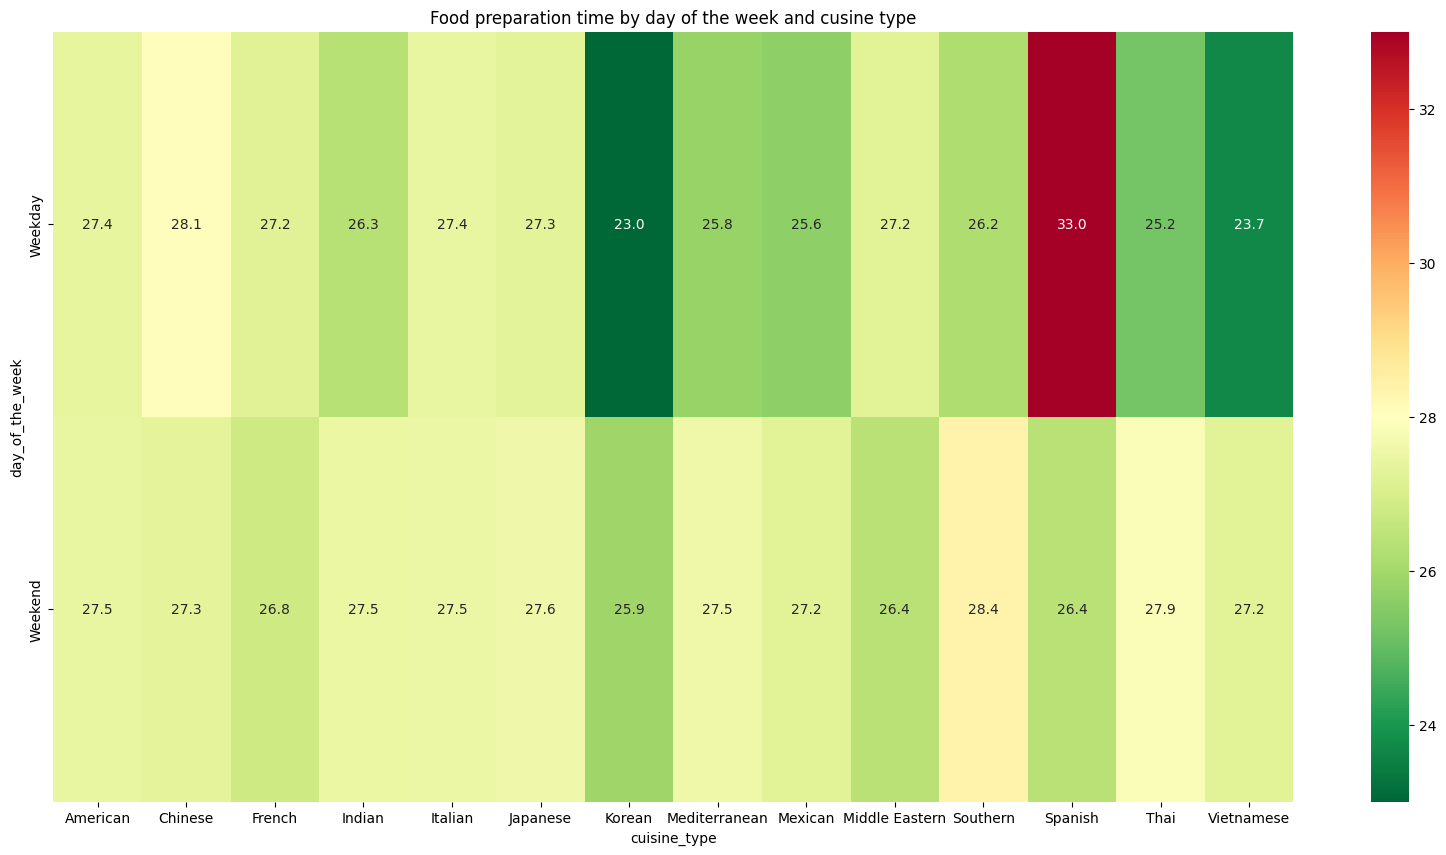

In [ ]:
# Create a pivot table
df_hm = df.pivot_table(index='day_of_the_week',columns='cuisine_type',values='food_preparation_time',aggfunc='mean')
# Draw a heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(df_hm,annot=True, cmap = 'RdYlGn_r',fmt = ".1f")
plt.title('Food preparation time by day of the week and cusine type')
plt.show()

##### Observations:


*   The spread in food preparation time is smaller during thwe weekend than the week
*   Korean food is fastest to prepare the weekend and the weekday
*   Spanish food is signifiocantely slower to prepare the weekday



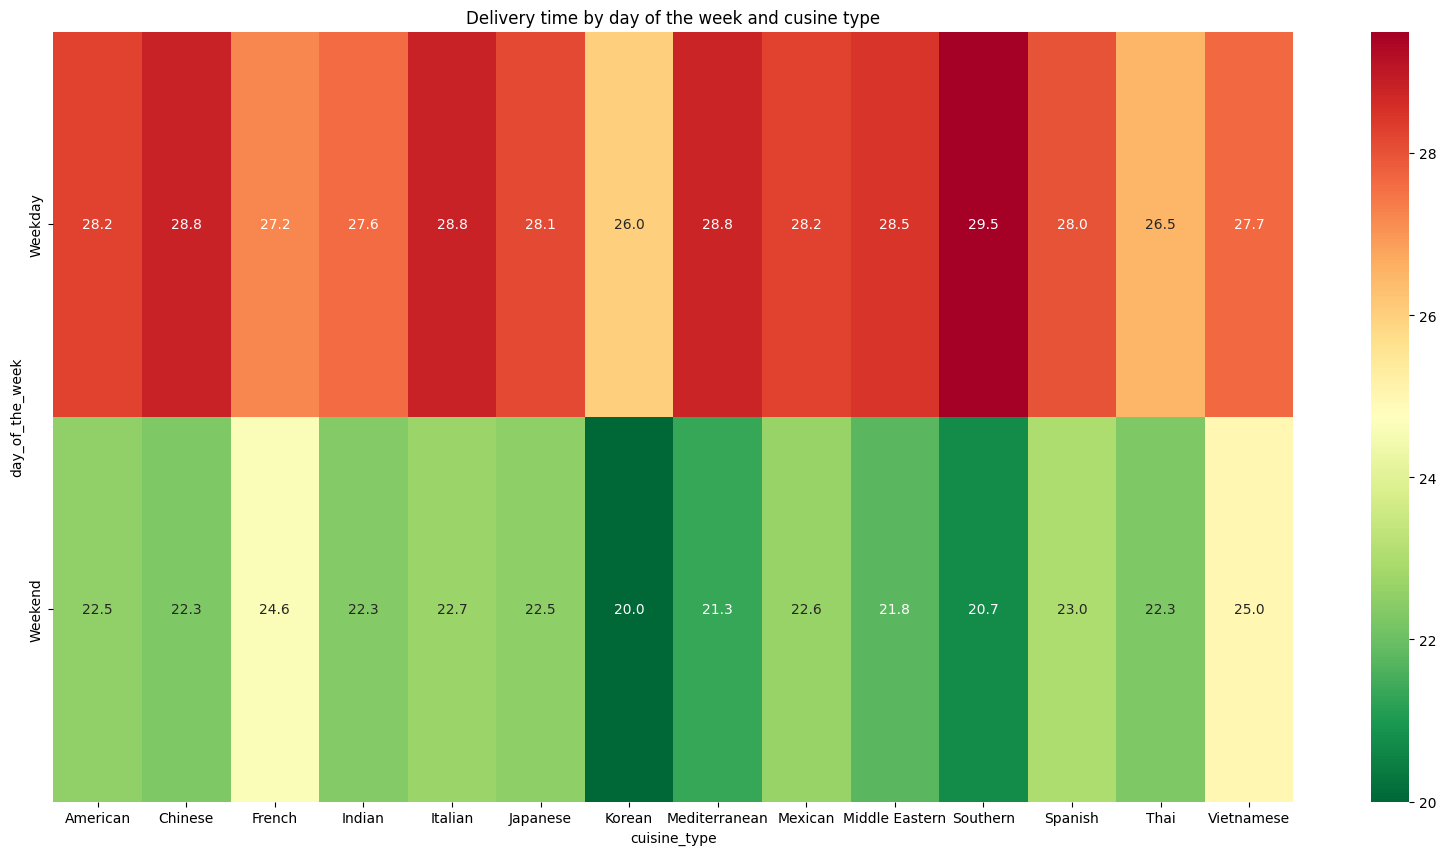

In [ ]:
# Create a pivot table
df_hm = df.pivot_table(index='day_of_the_week',columns='cuisine_type',values='delivery_time',aggfunc='mean')
# Draw a heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(df_hm,annot=True, cmap = 'RdYlGn_r',fmt = ".1f")
plt.title('Delivery time by day of the week and cusine type')
plt.show()

##### Observations :

*   Food Delivery is faster the weekend
*   Korean food is fastest to delivery weekday and weekend with a fastest mean delivery time of 20 minutes



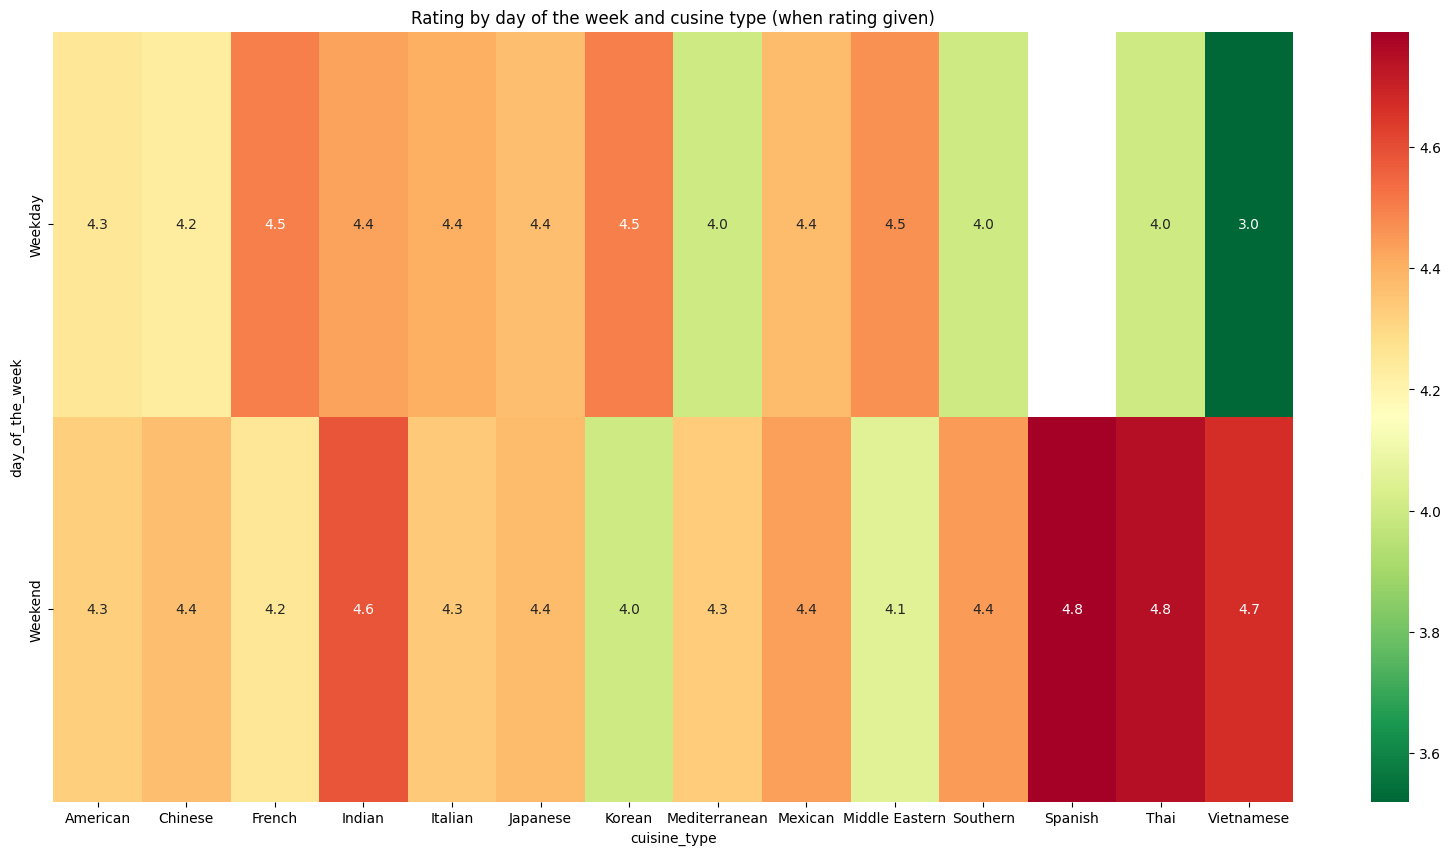

In [ ]:
# Create a pivot table
df_hm = filtereddf.pivot_table(index='day_of_the_week',columns='cuisine_type',values='rating',aggfunc='mean')
# Draw a heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(df_hm,annot=True, cmap = 'RdYlGn_r',fmt = ".1f",robust=True)
plt.title('Rating by day of the week and cusine type (when rating given)')
plt.show()

#### Observations:
*  Spanish and Thai have the highest rating score over weekend with 4.8
*  Vietnamese food during weekday has the lowest satisfaction score of 3 but the weekend score of 4.7

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# I define a minimum count and minimum rating variable then I can easily change these if needed
min_count=50 # minimum count
min_rating=4 # minimum rating
# I filter the data by removing the rows where no ratings were given
filtereddf=df.loc[(df['rating']!='Not given')].reset_index()
# I convert the rating column to int
filtereddf['rating']=filtereddf['rating'].astype(int)
# I count the of time each restaurant was rated
rating_counts = filtereddf['restaurant_name'].value_counts()
# I calculate the average rating for each restaurant using groupby
restaurant_ratings = filtereddf.groupby('restaurant_name')['rating'].mean()
# I create a dataframe with the restaurant name as index and the count and rating as columns
restaurant_stats = pd.DataFrame({'Count': rating_counts , 'Average Rating': restaurant_ratings},
                                index=restaurant_ratings.index)

# I filter out the restaurant with count greater than 50 and average rating greater than 4
restaurant_criteria=restaurant_stats[((restaurant_stats['Count']>min_count) & (restaurant_stats['Average Rating']>min_rating))]
# I use the index attribute to print the restaurant names filling the criteria
print('The restaurants with a rating count grater than 50 and an average rating greater than 4 are:')
for restaurant in restaurant_criteria.index:
  print(restaurant)

The restaurants with a rating count grater than 50 and an average rating greater than 4 are:
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Shake Shack
The Meatball Shop


#### Observations:
To obtain the list of restaurant filling the criteria I had to filter the Not given ratings convert the ratings to int then count the number of time the restaurant appeared in the data and calculate their mean rating using the groupby method.
Only 4 restaurants have a a rating count grater than 50 and an average rating greater than 4 and they are:


*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# I isolate the number of cases
order520=df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]
ordergt20=df[(df['cost_of_the_order']>20)]

# I sum the 'cost_of_the_order' and multiply by 0.15 and 0.25 respectively
net_revenue=order520['cost_of_the_order'].sum()*0.15+ordergt20['cost_of_the_order'].sum()*0.25

print(f'The net revenue generated by the company across all orders is {net_revenue.sum()}')

The net revenue generated by the company across all orders is 6166.303


#### Observations:
I filtered the dataset and use the sum method to calculate the net revenue of the company accross all orders of 6166.30$

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# I create a column total time by adding 'delivery_time' and 'food_preparation_time'
df['total_time']=df['delivery_time']+df['food_preparation_time']
# I set a criteria to 60 for reproducibility
mini_time=60
over60=np.sum(df['total_time']>mini_time)/len(df['total_time'])*100
print(f'The percentage of the orders that take more than {mini_time} minutes is {over60}%')

The percentage of the orders that take more than 60 minutes is 10.537407797681771%


#### Observations:
To calculate the total time required to deliver the food I added the 'delivery_time' and 'food_preparation_time' and I have then simply divided the total time number of order by the number of order.  **The percentage of the orders that take more than 60 minutes is 10.54%**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

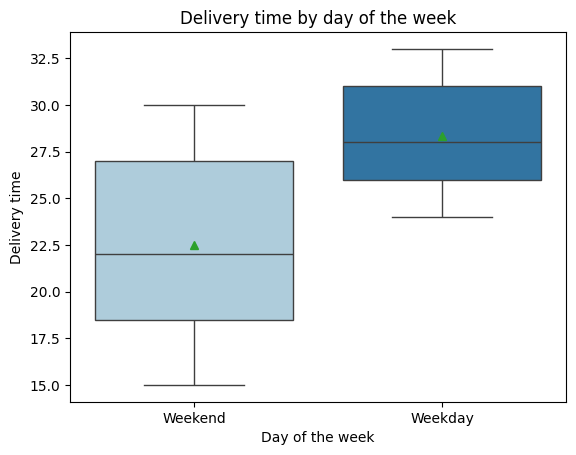

In [ ]:
"""
Here I show a box plot of the delivery time for both weekend and weekday
I use the showmeans options to display the mean in the box plot
I use the hue option to display separate the weekend and weekday boxplots
I use the palette option to change the color of the boxplot
y-axis is the delivery time
x-axis is the day of the week
"""
ax=sns.boxplot(df,y='delivery_time',x='day_of_the_week',showmeans=True, palette='Paired', hue=df['day_of_the_week'])
ax.set_title('Delivery time by day of the week')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Delivery time')
plt.show()

#### Observations:
Deliveries are in average quicker the weekend compared to weekday:

*   The mean delivery time is 22.5 minutes the weekend while about 27.5 minutes the weekend
*   The fastest weekday delivery is slower than the average weekend delivery
*   75 % of weekend deliveries are faster than the average weekday delivery



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The majority of FoodHub orders were placed during the weekend.
*  The majority of FoodHub customers approximately 65% have only placed a single order.
* The most polar restaurant is shake Shack
* The most popular cuisine is american
* A majority of rating are not given


### Recommendations:

There is a need to increase the customer retention:
* There is need to increase feedback to understand why people do not order anymore, there is a need to offer incentives for feedback.
* There are less order during the week and they take longer to deliver, and
generally have a lower rating. Incentive shorter food preparation time and increase the workkday delivery fleet to attract customers during their lunch break. Lower food preparation and delivery should also increase the workday rating
* In order to help restaurant to reduce delivery time during lunch break we could propose an alternative way of billing: 15% of total order during weekday and 25% during weekends:




In [ ]:
alternative_netrevenue=df.groupby('day_of_the_week')['cost_of_the_order'].sum()[0]*0.15+df.groupby('day_of_the_week')['cost_of_the_order'].sum()[1]*0.25
print(f'The alternative net revenue generated by the company across all orders is {alternative_netrevenue}')

The alternative net revenue generated by the company across all orders is 6936.482999999999


This proposed alternative formula would:


*   Increase Foodhub revenue from 6166\$ to 6936\$
*   Help restaurant to lower their prices during workdays to make food delivery a more attractive option



---